In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

In [93]:
data = pd.read_csv('./data_i.csv')
data.head(1)

,Netflows,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,Avg_pps,...,First_Protocol_TCP,First_Protocol_UDP,Type_mine,Type_not_mine,Cryptocurrency_Bitcash,Cryptocurrency_Bitcoin,Cryptocurrency_Does not have,Cryptocurrency_Etherium,Cryptocurrency_Litecoin,Cryptocurrency_Monero
0,1.575318,-0.700949,-0.804477,-0.909496,0.054551,-0.864733,-0.625504,0.570941,1.236305,1.285332,...,1,0,0,1,0,0,1,0,0,0


# Best Features

In [94]:
Feature_Selection = ['p1_d', 'p2_d','min_d','#sp','#dp','first_sp', 'first_dp', 'second_sp','second_dp']

In [95]:
X = data[Feature_Selection]
y = data['Type_mine']

# Holdout

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, test_size=0.3)

In [97]:
model = svm.SVC(probability=True)

In [98]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [99]:
y_pred = model.predict(X_test)

([<matplotlib.axis.YTick at 0x16404a74a58>,
 <a list of 2 Text yticklabel objects>)

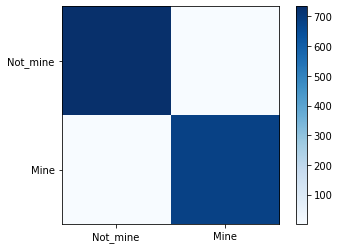

In [100]:
churm = metrics.confusion_matrix(y_test, y_pred)
plt.imshow(churm, cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not_mine','Mine'])
plt.yticks(tick_marks, ['Not_mine','Mine'])

In [101]:
churm

array([[733,   2],
       [  3, 682]], dtype=int64)

In [102]:
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa: ", metrics.accuracy_score(y_test, y_pred))

Exactitud:  0.9964788732394366
Kappa:  0.9964788732394366


In [103]:
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[1], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[1], average='macro'))

VN = np.sum(churm[1:3,1:3])
FP = np.sum(churm[0,1:3])
specificity = VN/(VN+FP)

print("Especificidad : ", specificity)

print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[1], average='macro'))

Precisión     :  0.9970760233918129
Recall        :  0.9956204379562044
Especificidad :  0.9970760233918129
F1-score      :  0.9963476990504018


In [104]:
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[0], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[0], average='macro'))

VN = np.sum(churm[1:3,1:3])
FP = np.sum(churm[0,1:3])
specificity = VN/(VN+FP)

print("Especificidad : ", specificity)

print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[0], average='macro'))

Precisión     :  0.9959239130434783
Recall        :  0.9972789115646259
Especificidad :  0.9970760233918129
F1-score      :  0.9966009517335146


In [105]:
y_pred_proba = model.predict_proba(X_test)

In [106]:
lr_probs = y_pred_proba[:,1]

In [107]:
ns_probs = [0 for _ in range(len(y_test))]

In [108]:
ns_auc = metrics.roc_auc_score(y_test, ns_probs)
ns_auc

0.5

In [109]:
lr_auc = metrics.roc_auc_score(y_test, lr_probs)
lr_auc

0.9988817716867769

In [110]:
#Sumo los scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('VSM: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
VSM: ROC AUC=0.999


In [111]:
ns_fpr, ns_tpr, thresholds  = metrics.roc_curve(y_test,ns_probs)
lr_fpr, lr_tpr, thresholds = metrics.roc_curve(y_test, lr_probs)

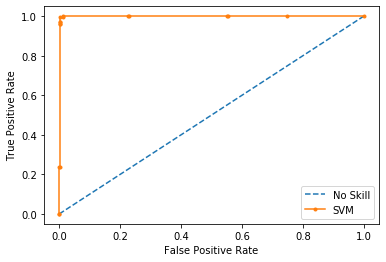

In [112]:
#Plot la roc curva para el modelo
plt.plot(ns_fpr,ns_tpr,linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()